# CAPSTONE

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Polygon, MultiLineString
from pathlib import Path

## 0. First data

<Axes: >

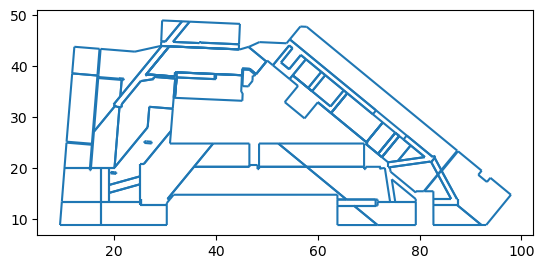

In [4]:
path = Path("data", "geojson", "Output3.geojson")

gdf = gpd.GeoDataFrame.from_file(path)

gdf.plot(aspect=1)

(1, 3)
(19, 5)
(5, 5)
(252, 5)
(7, 5)
(95, 5)
(153, 5)
(71, 5)
(686, 5)


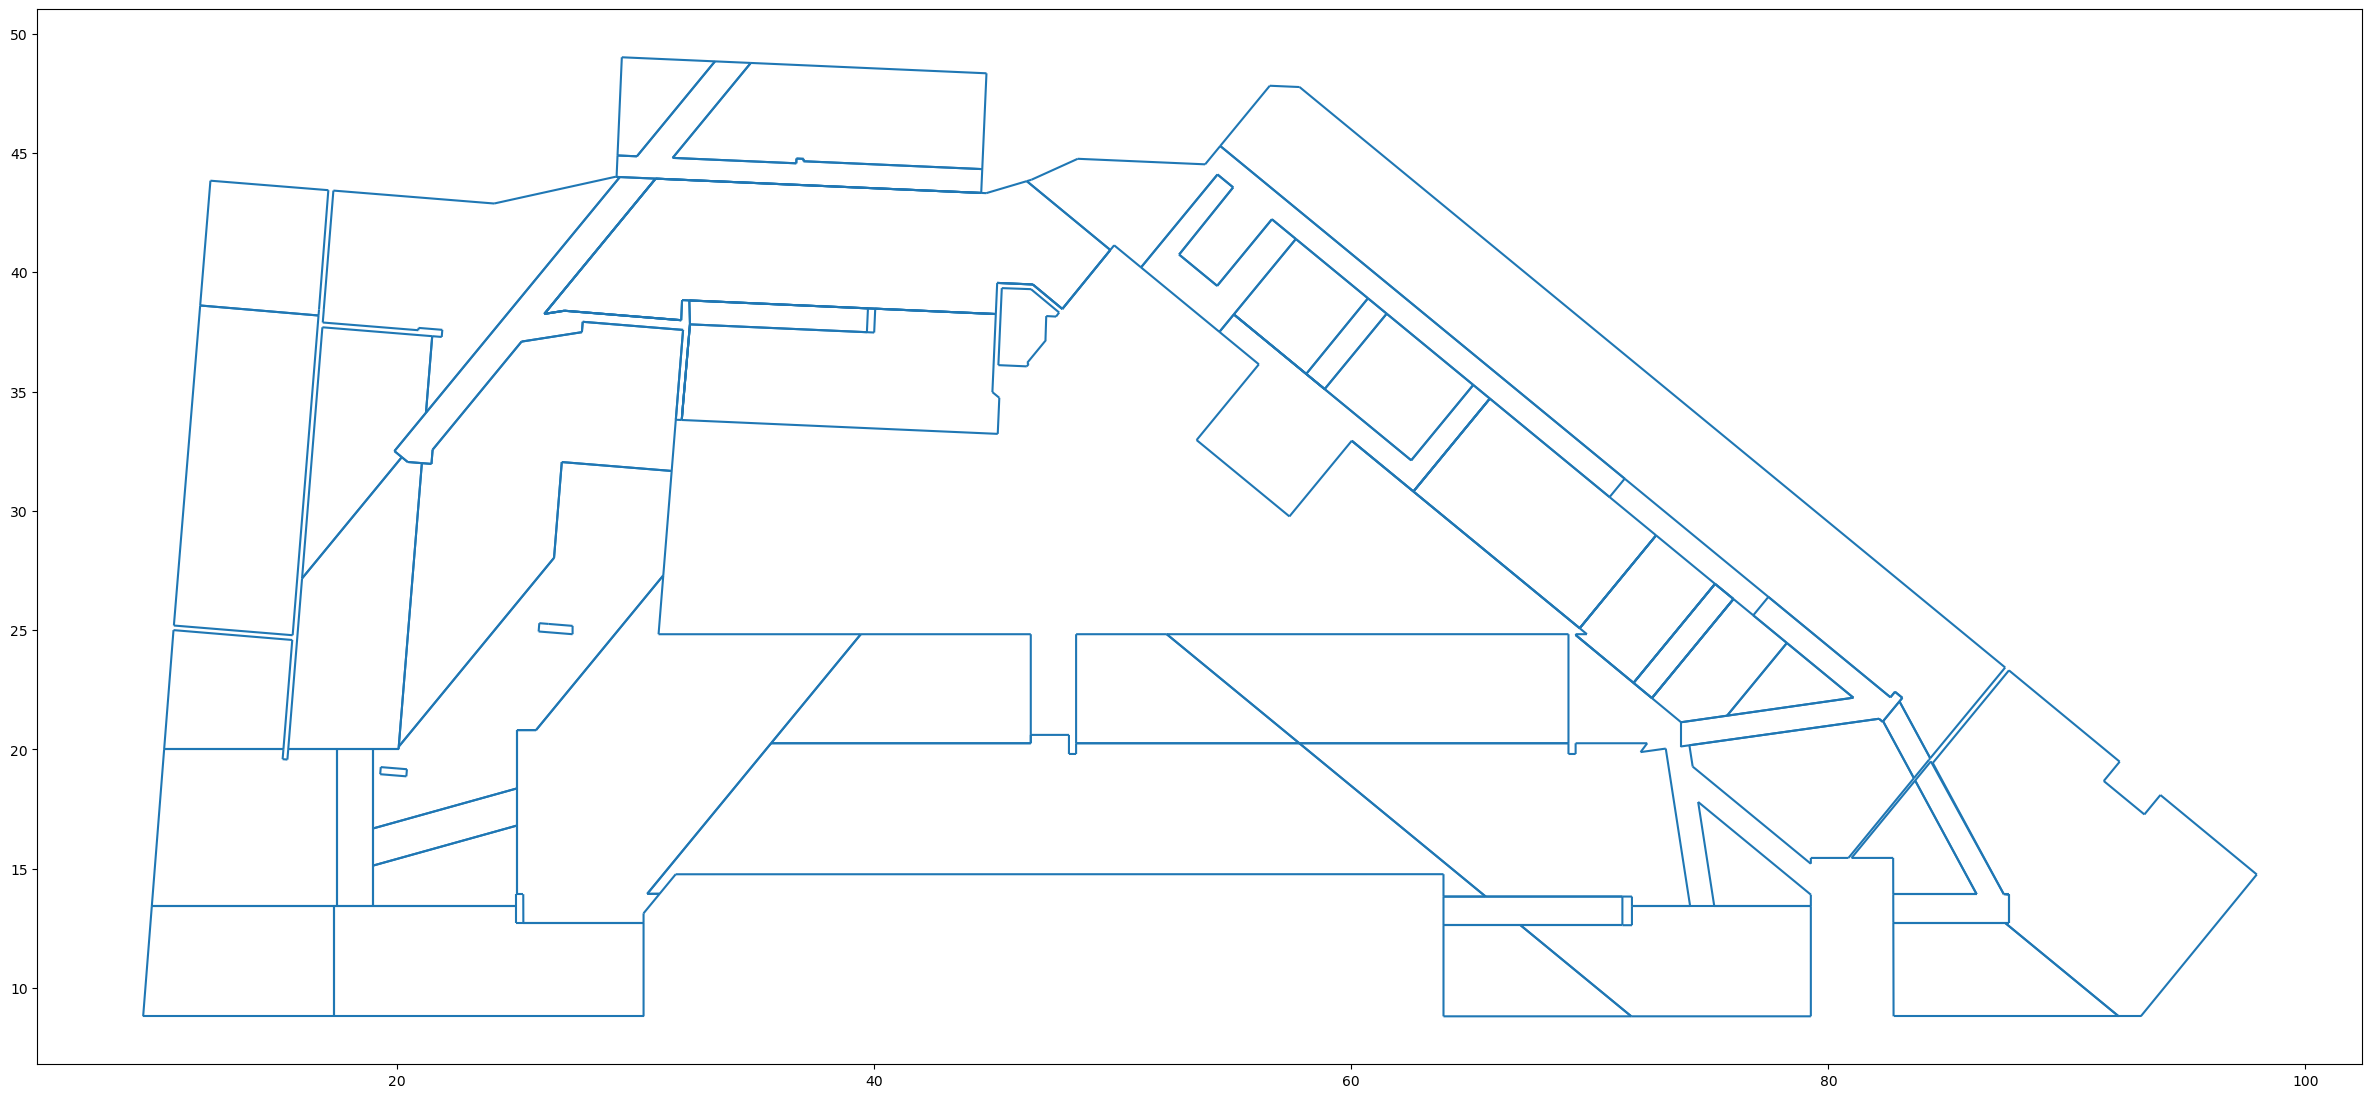

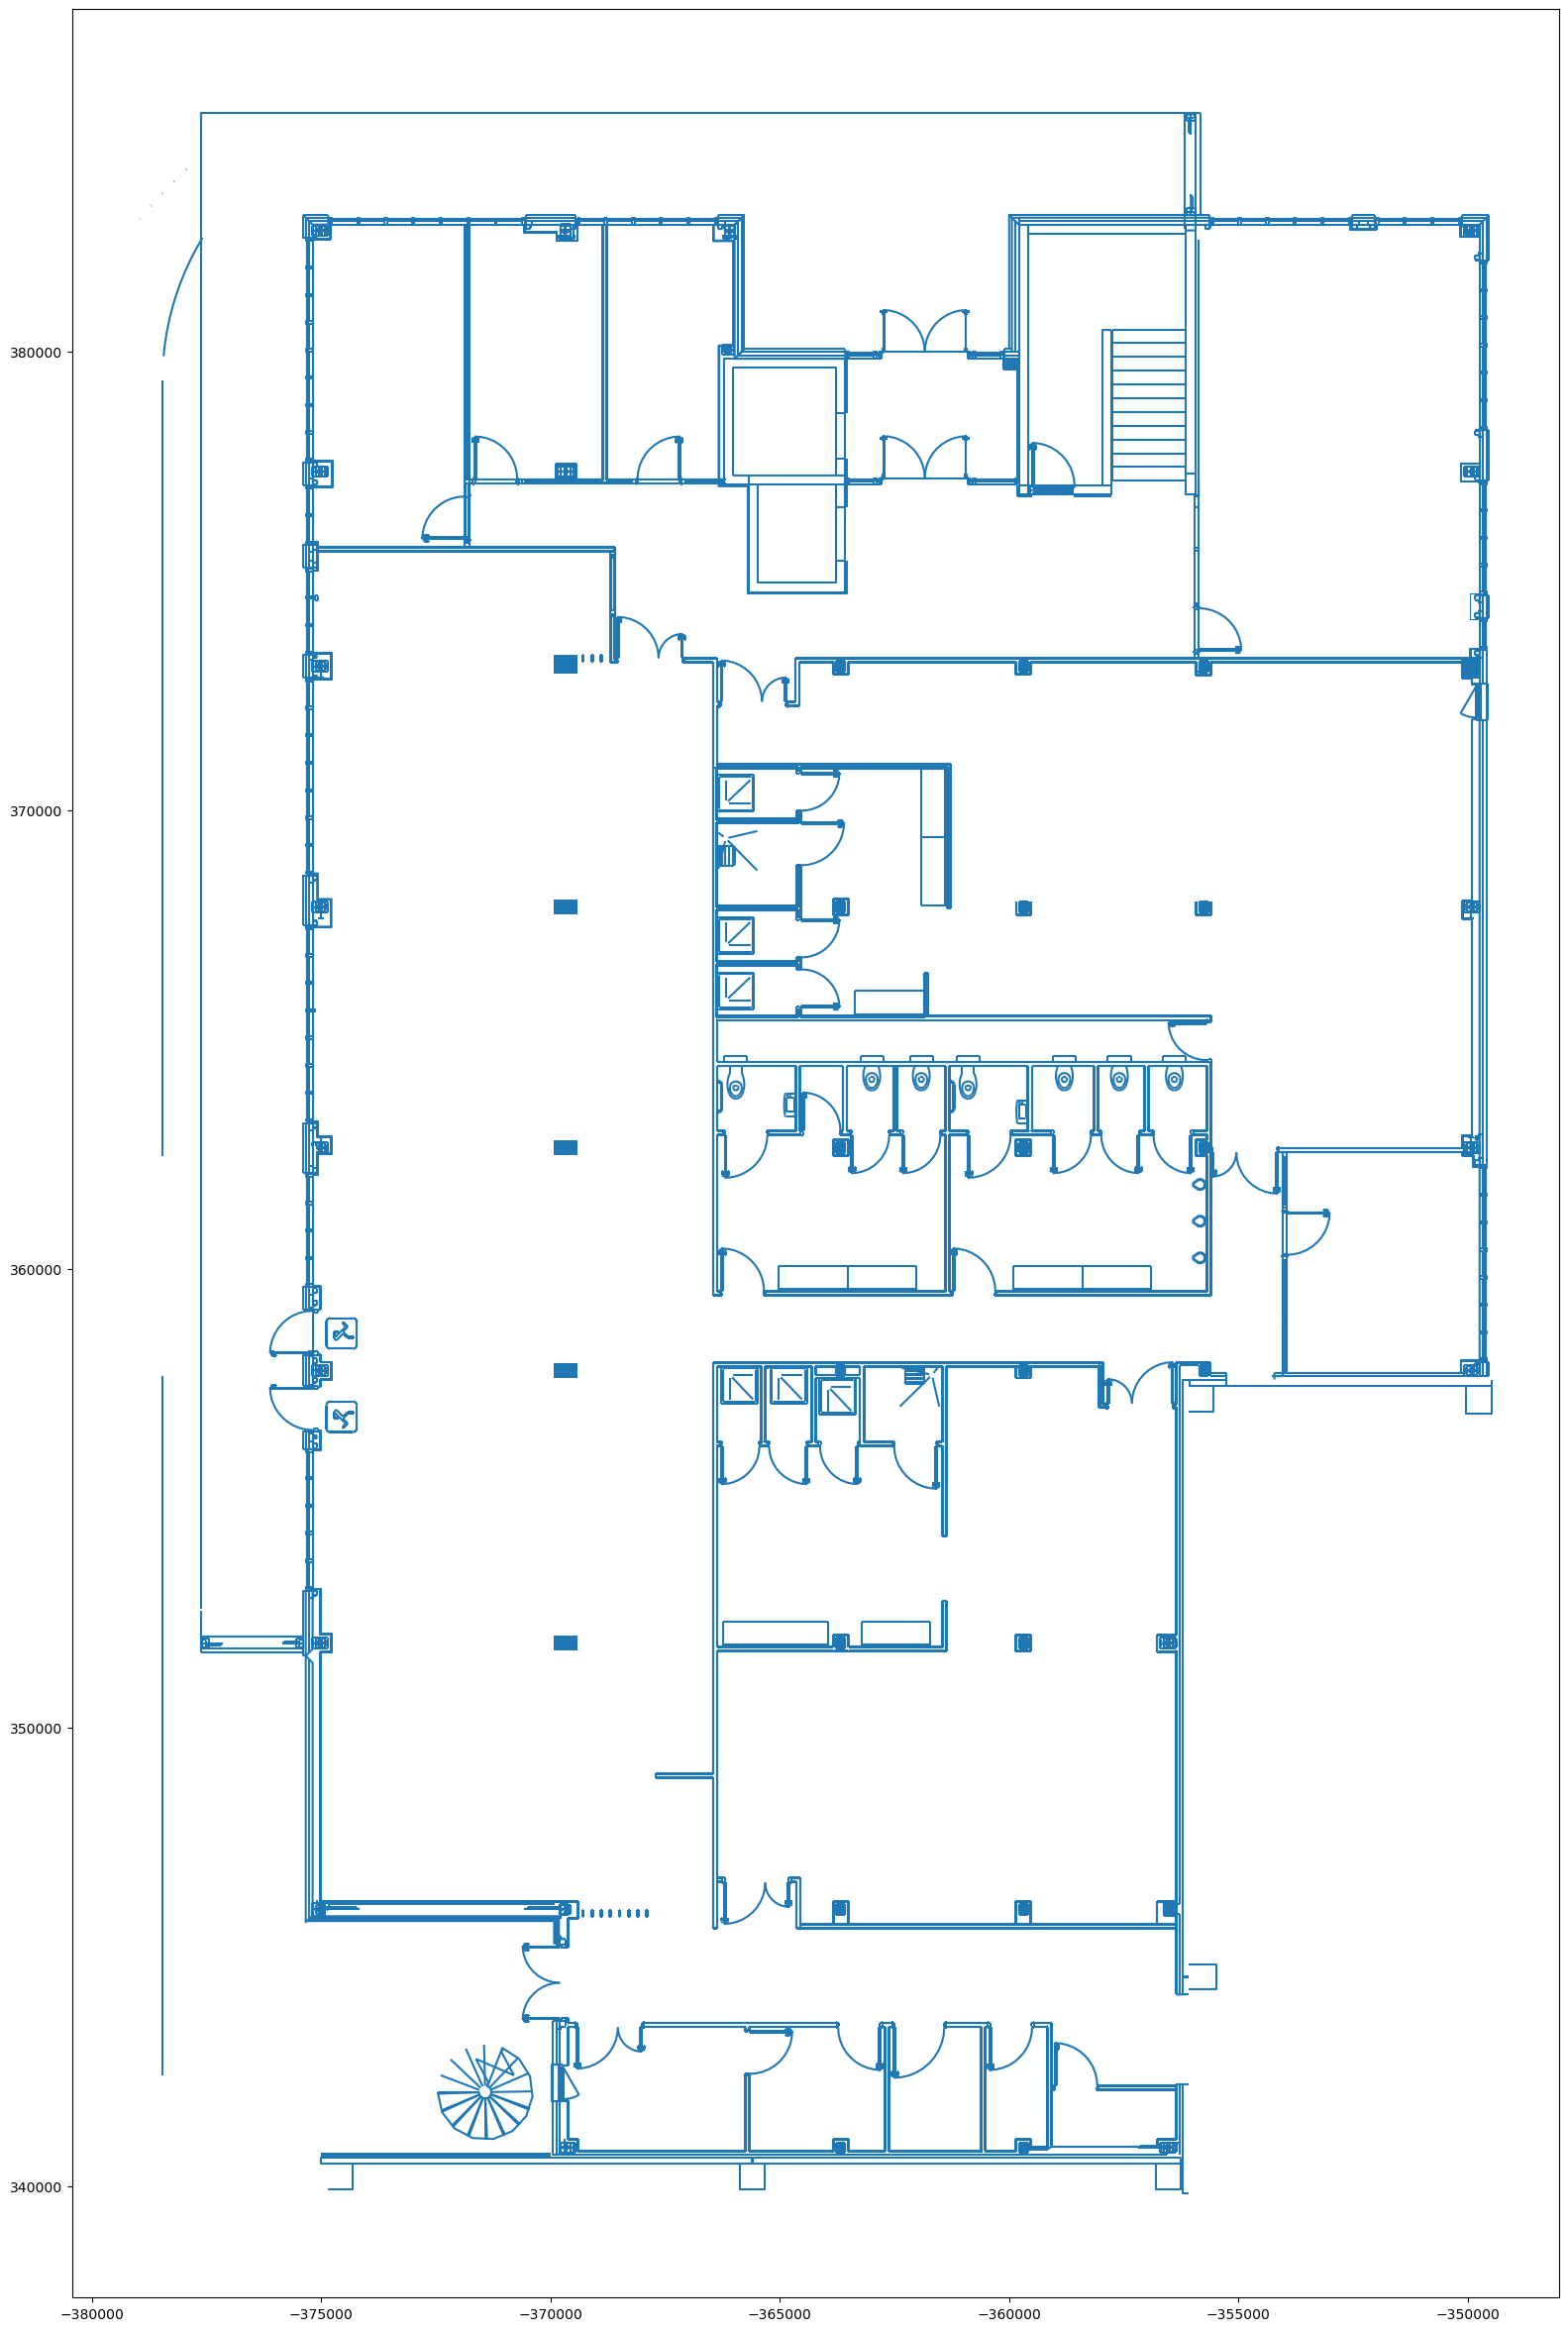

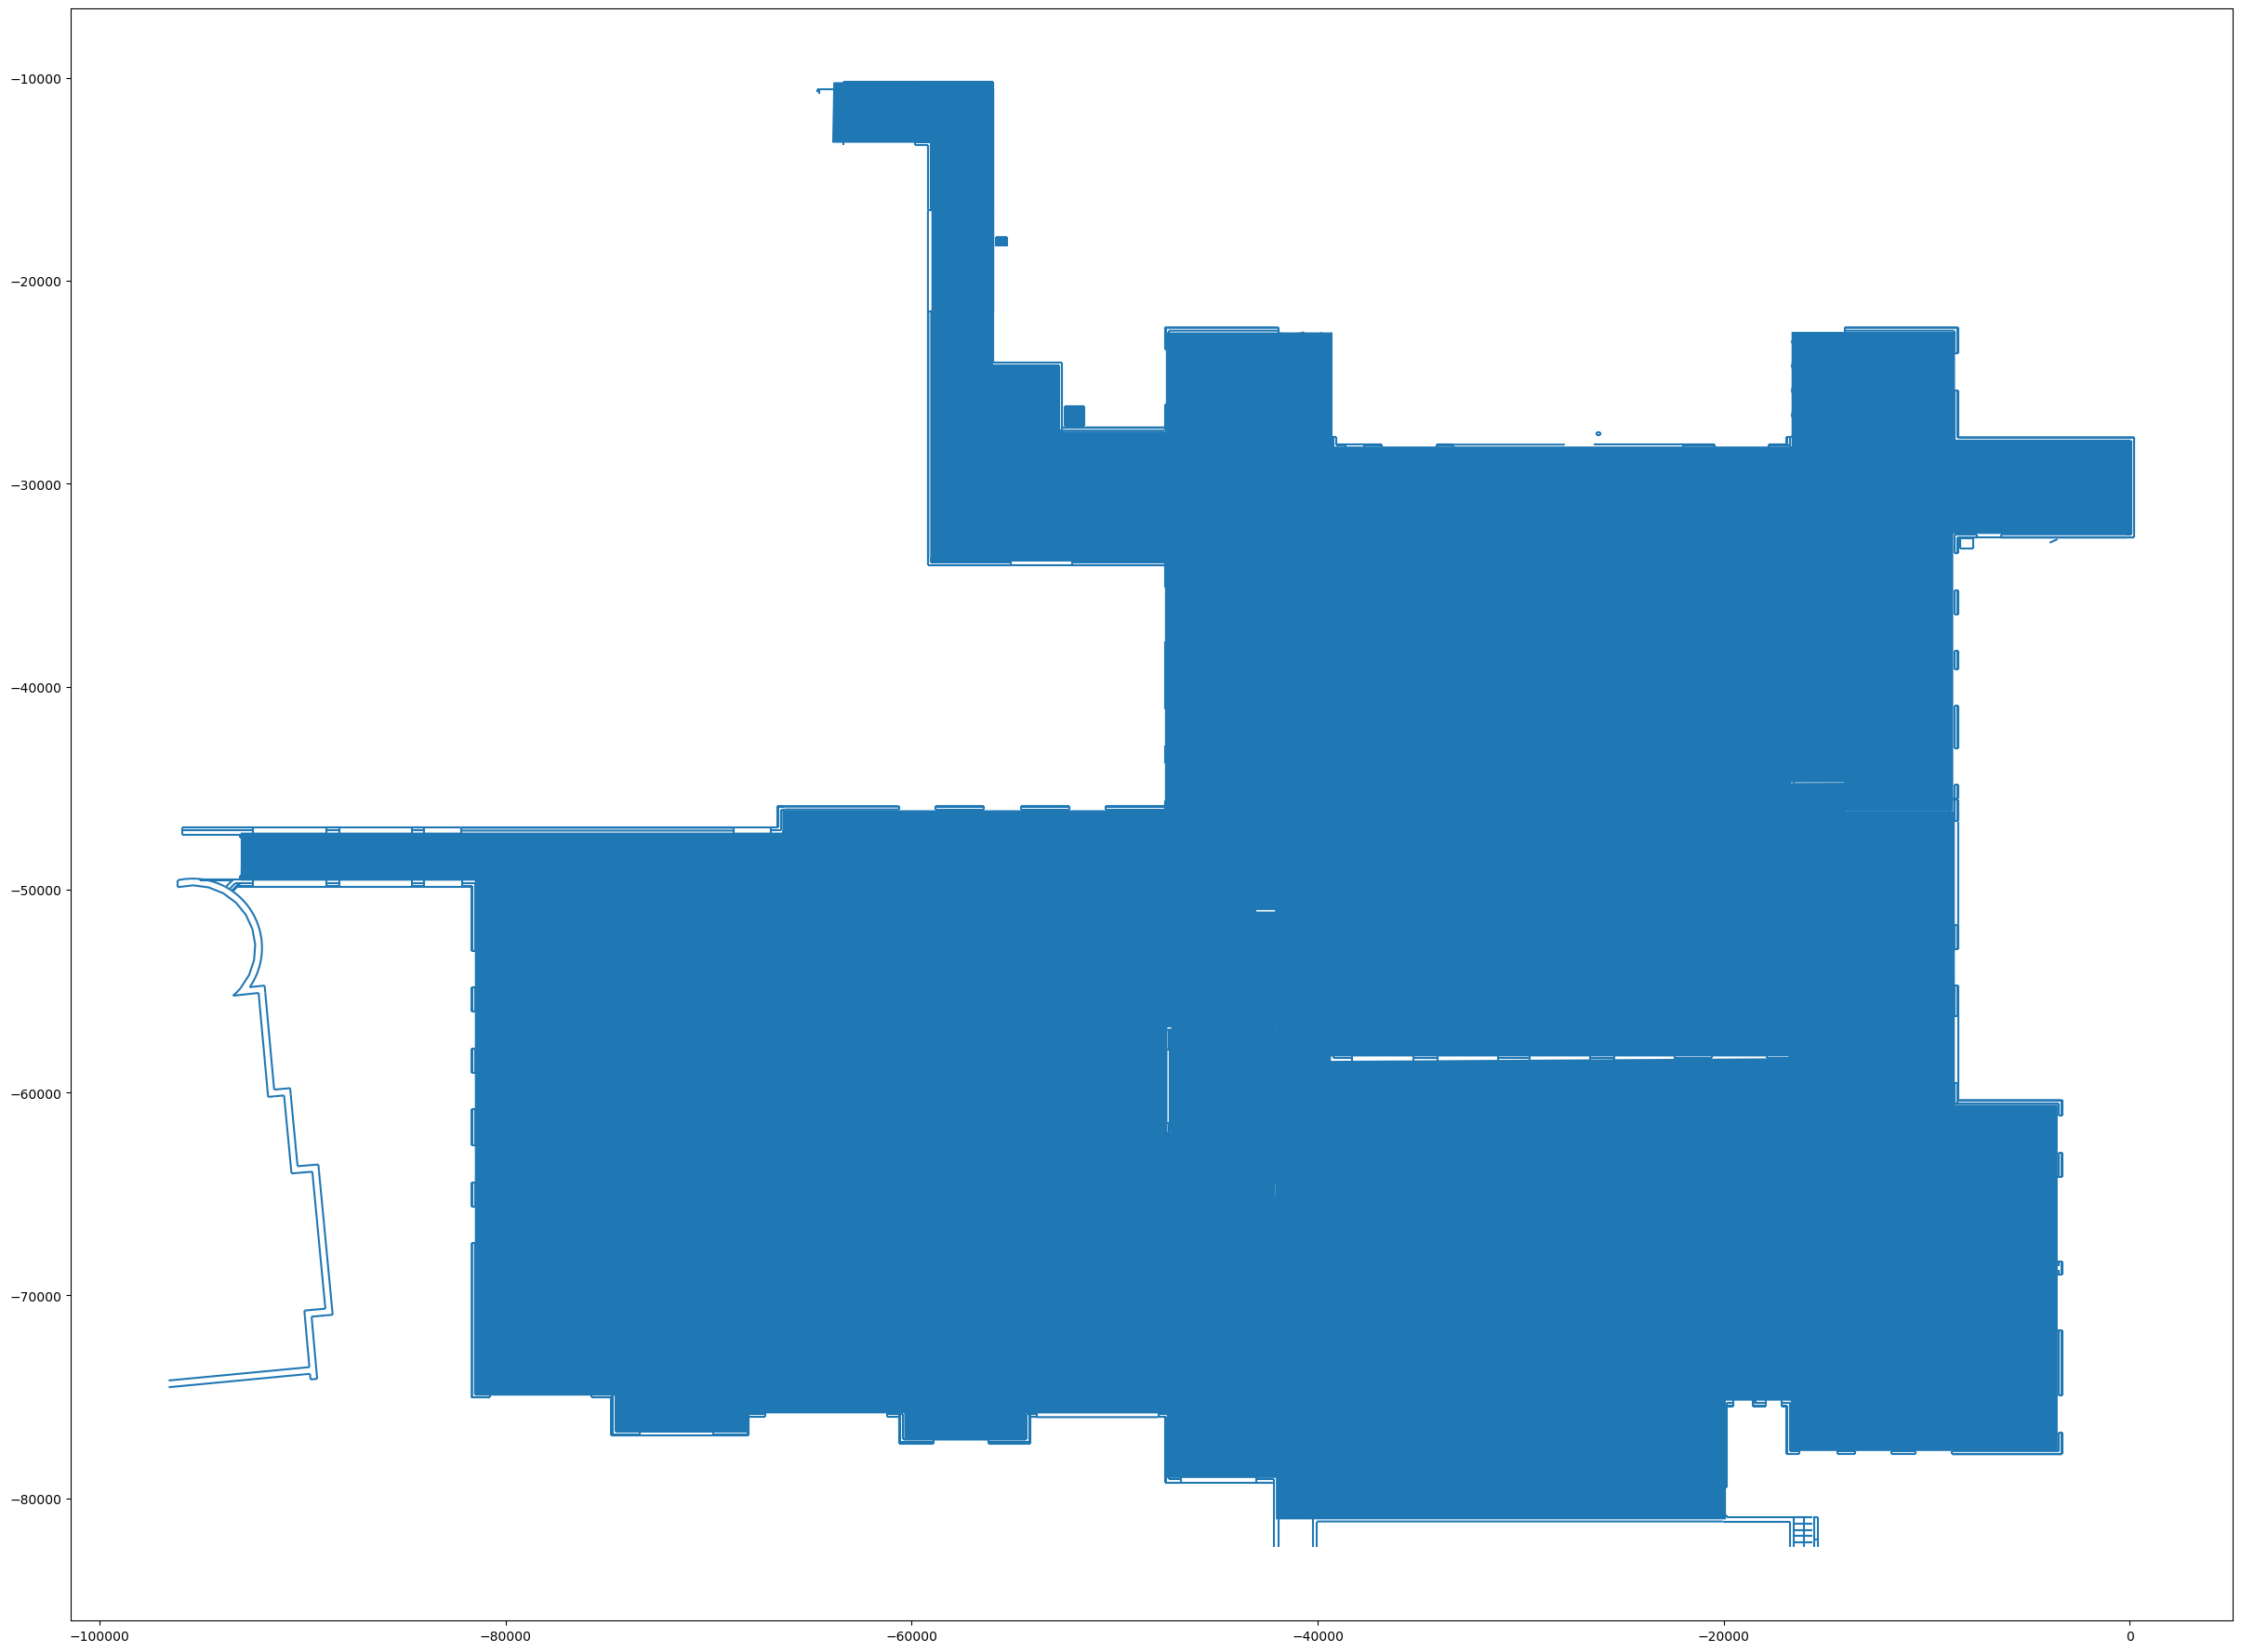

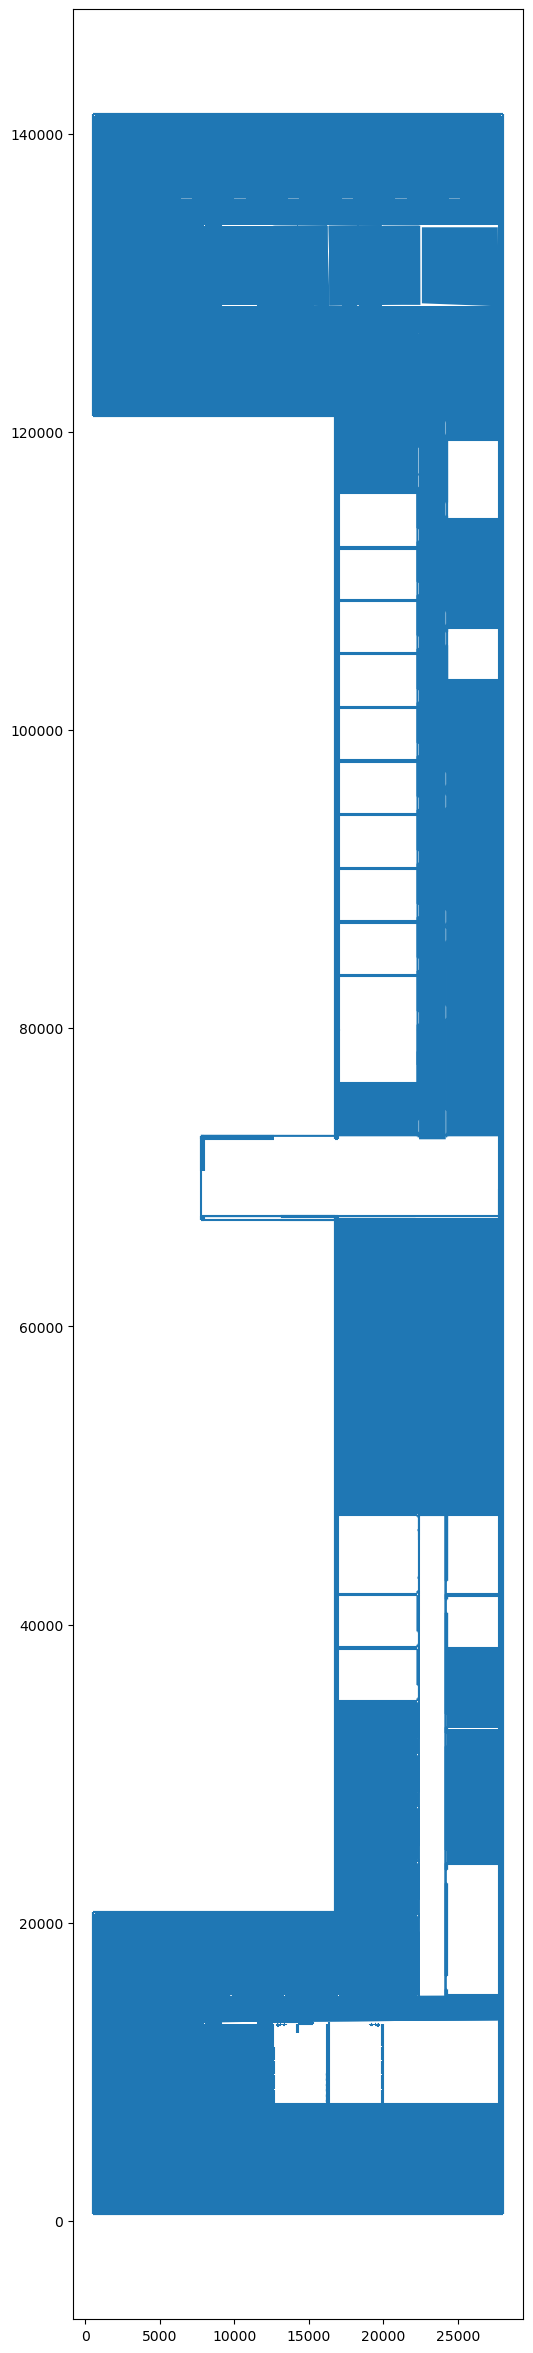

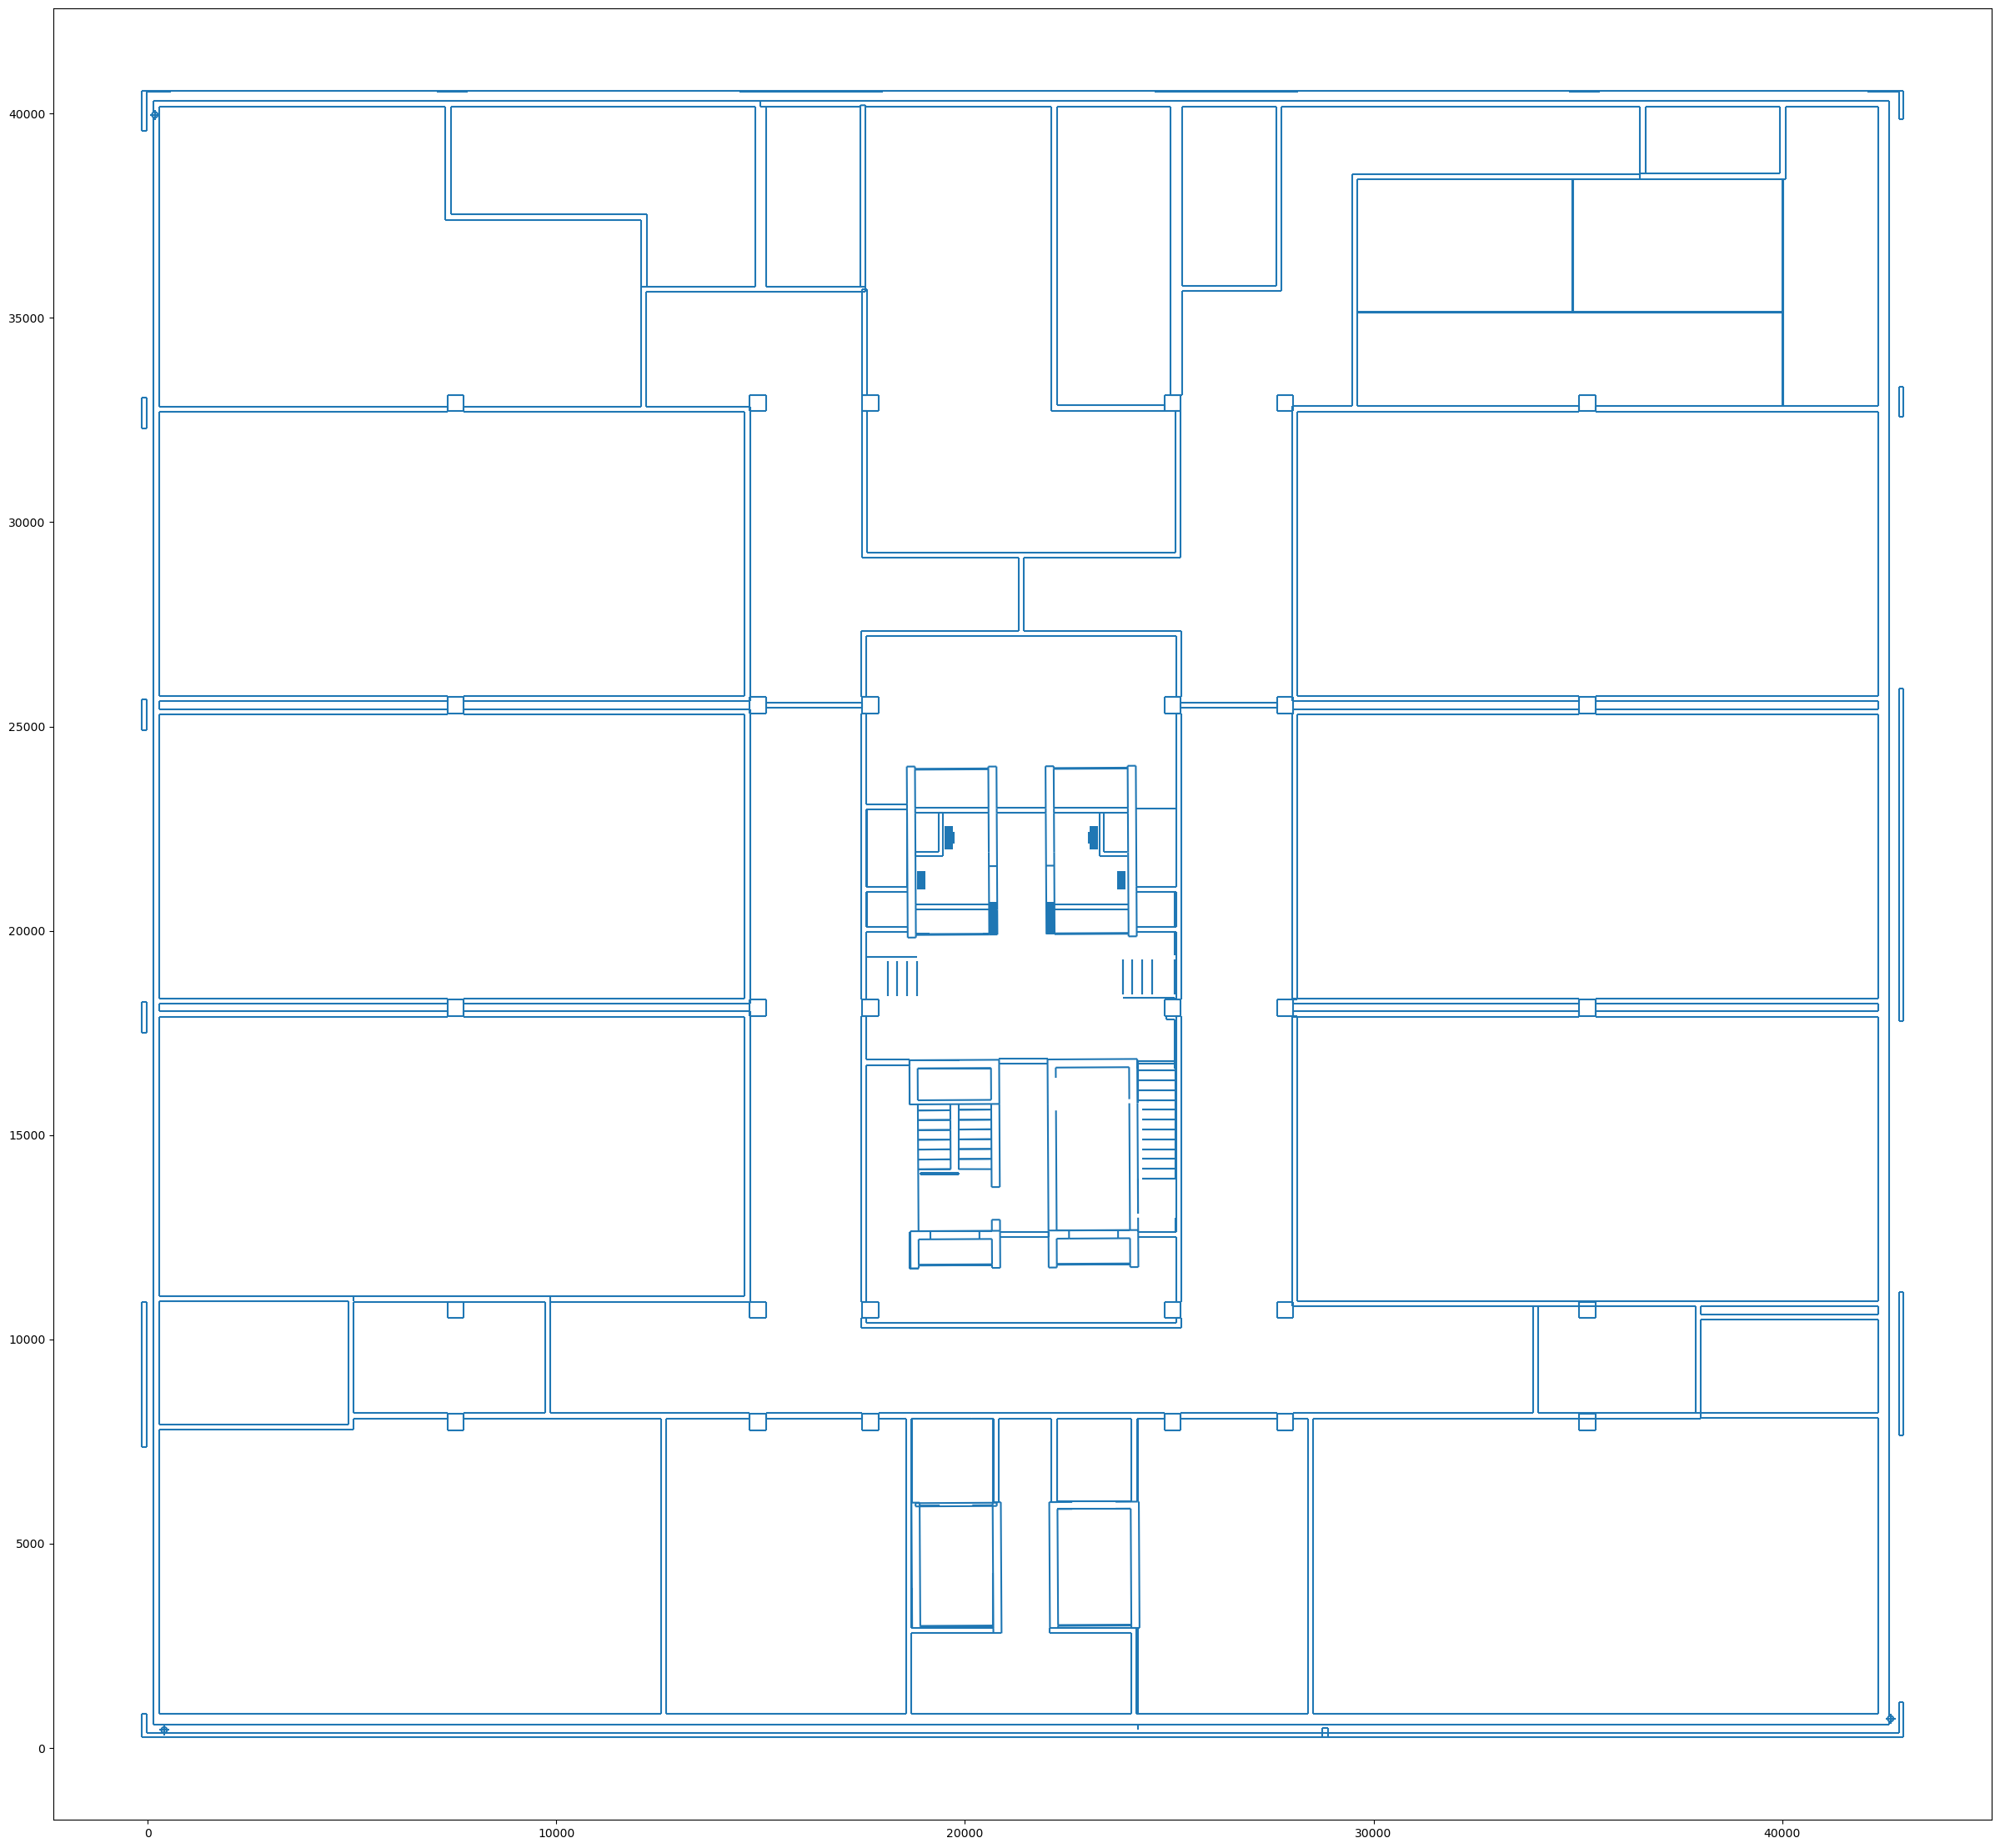

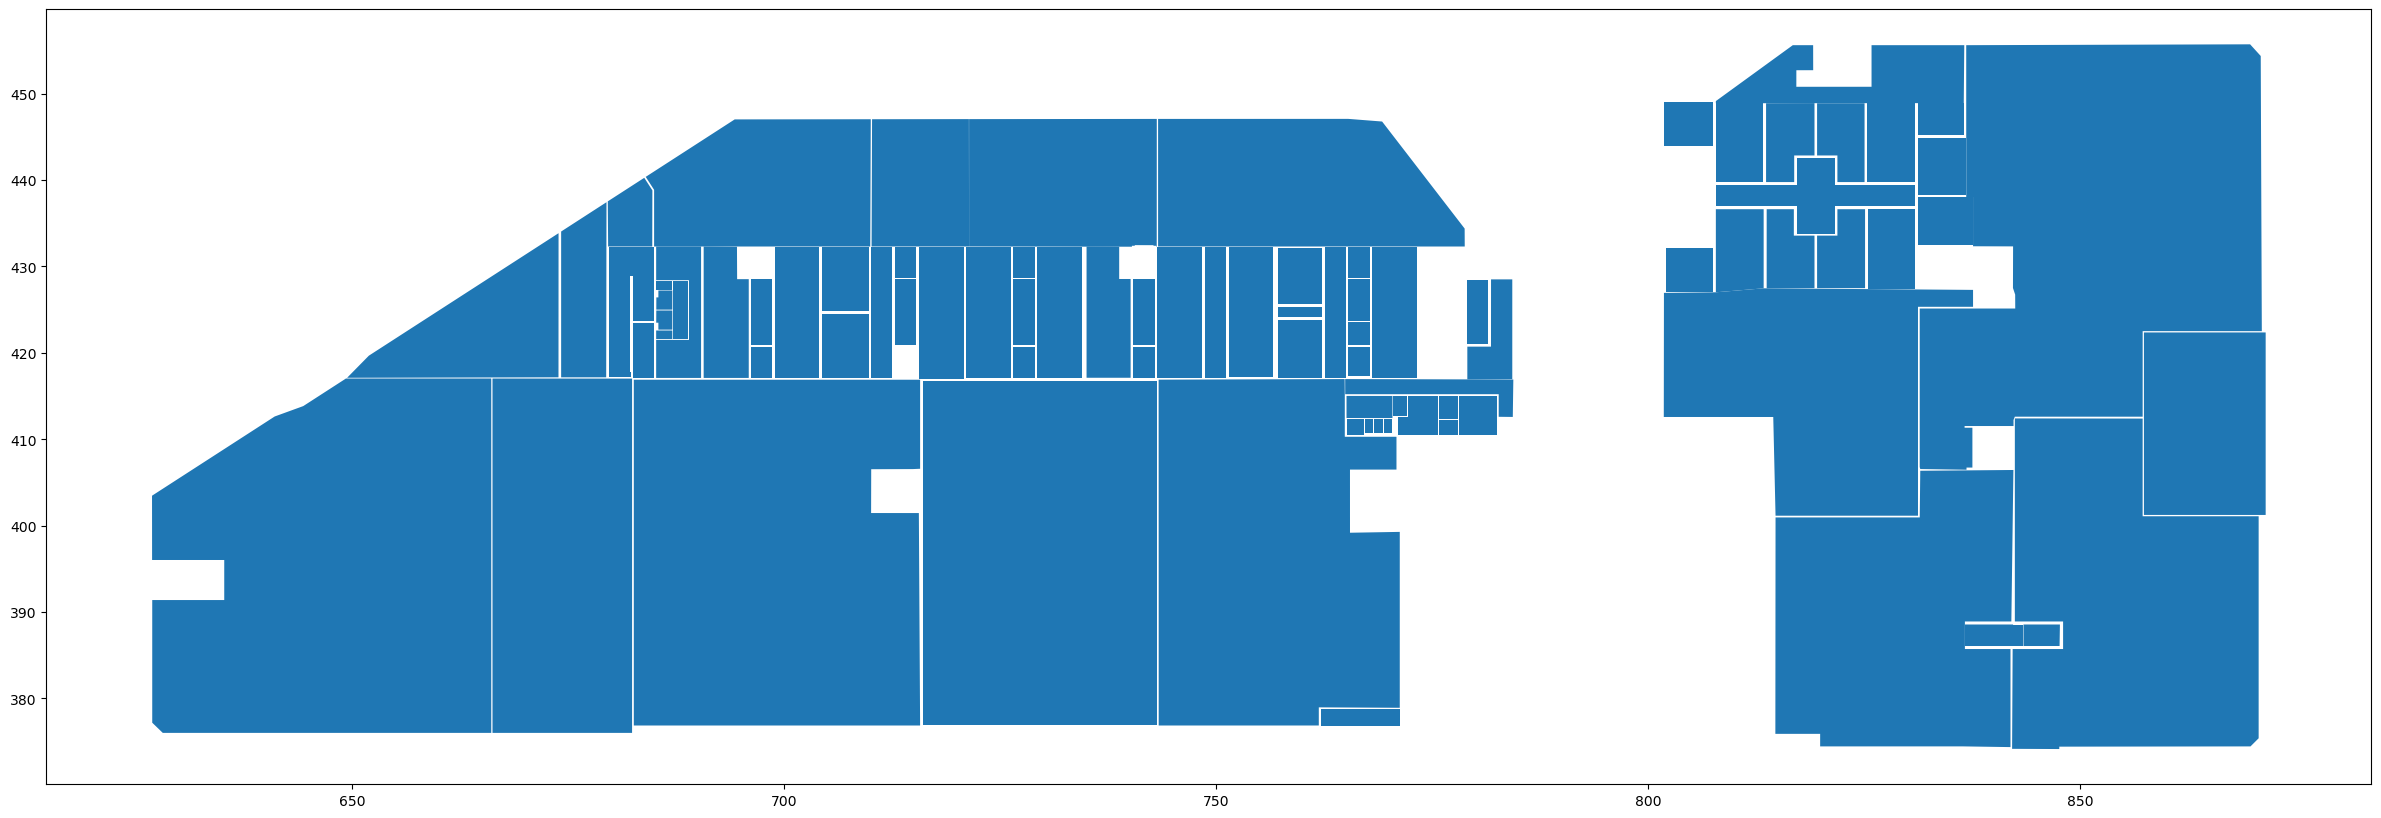

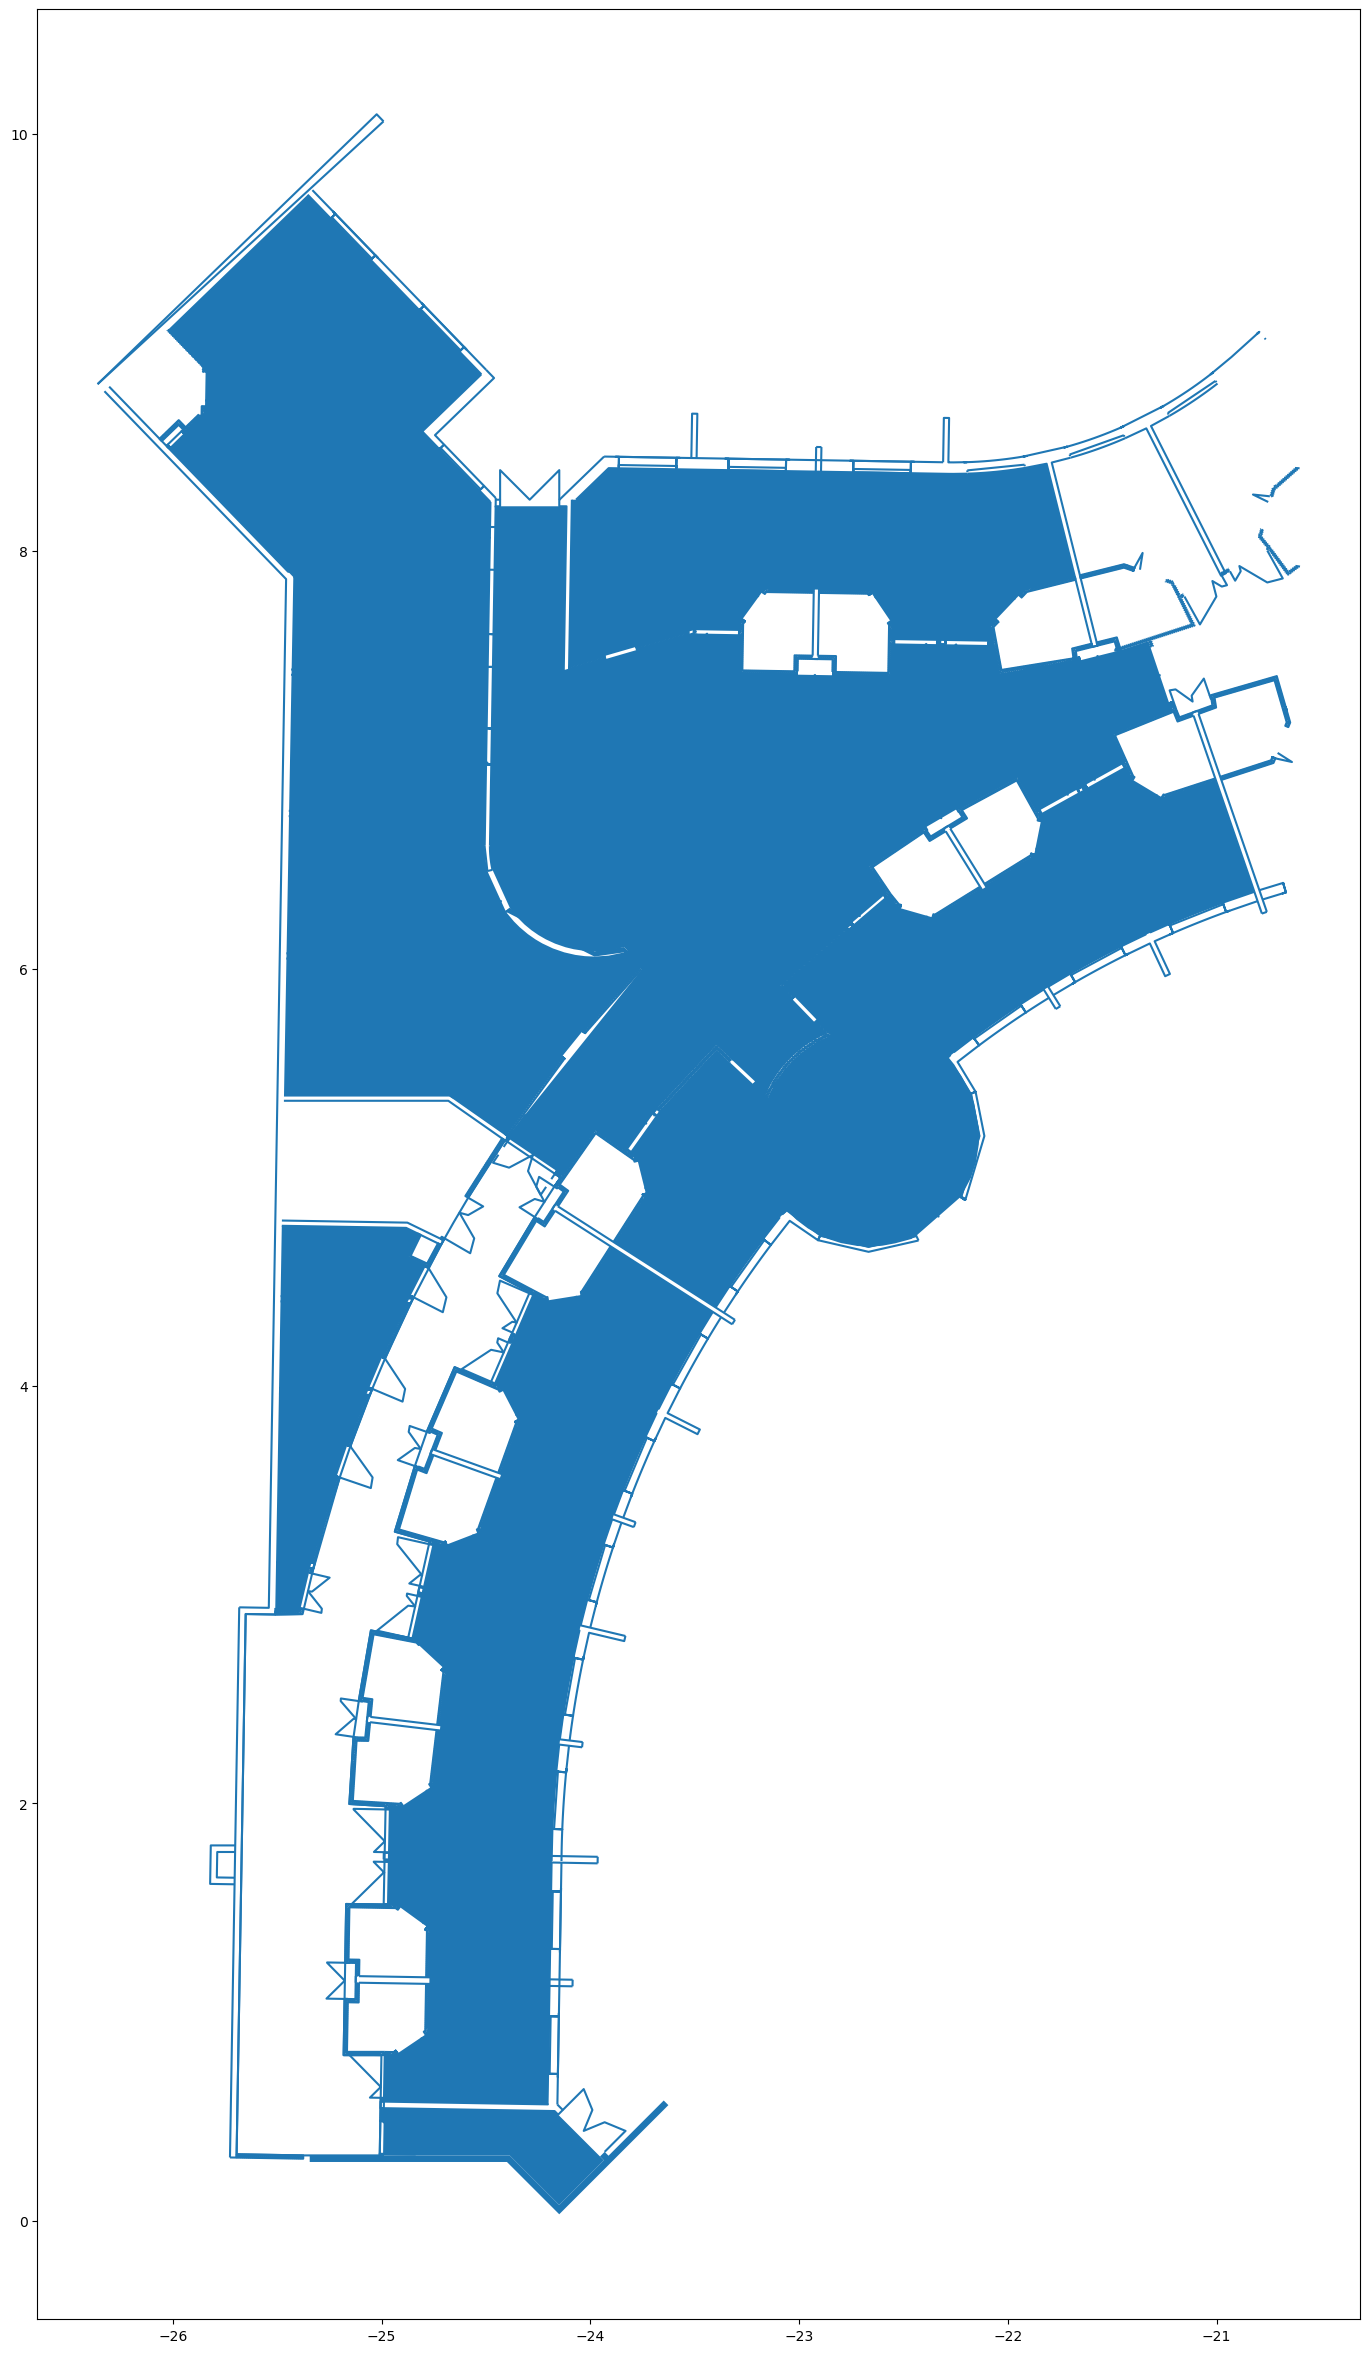

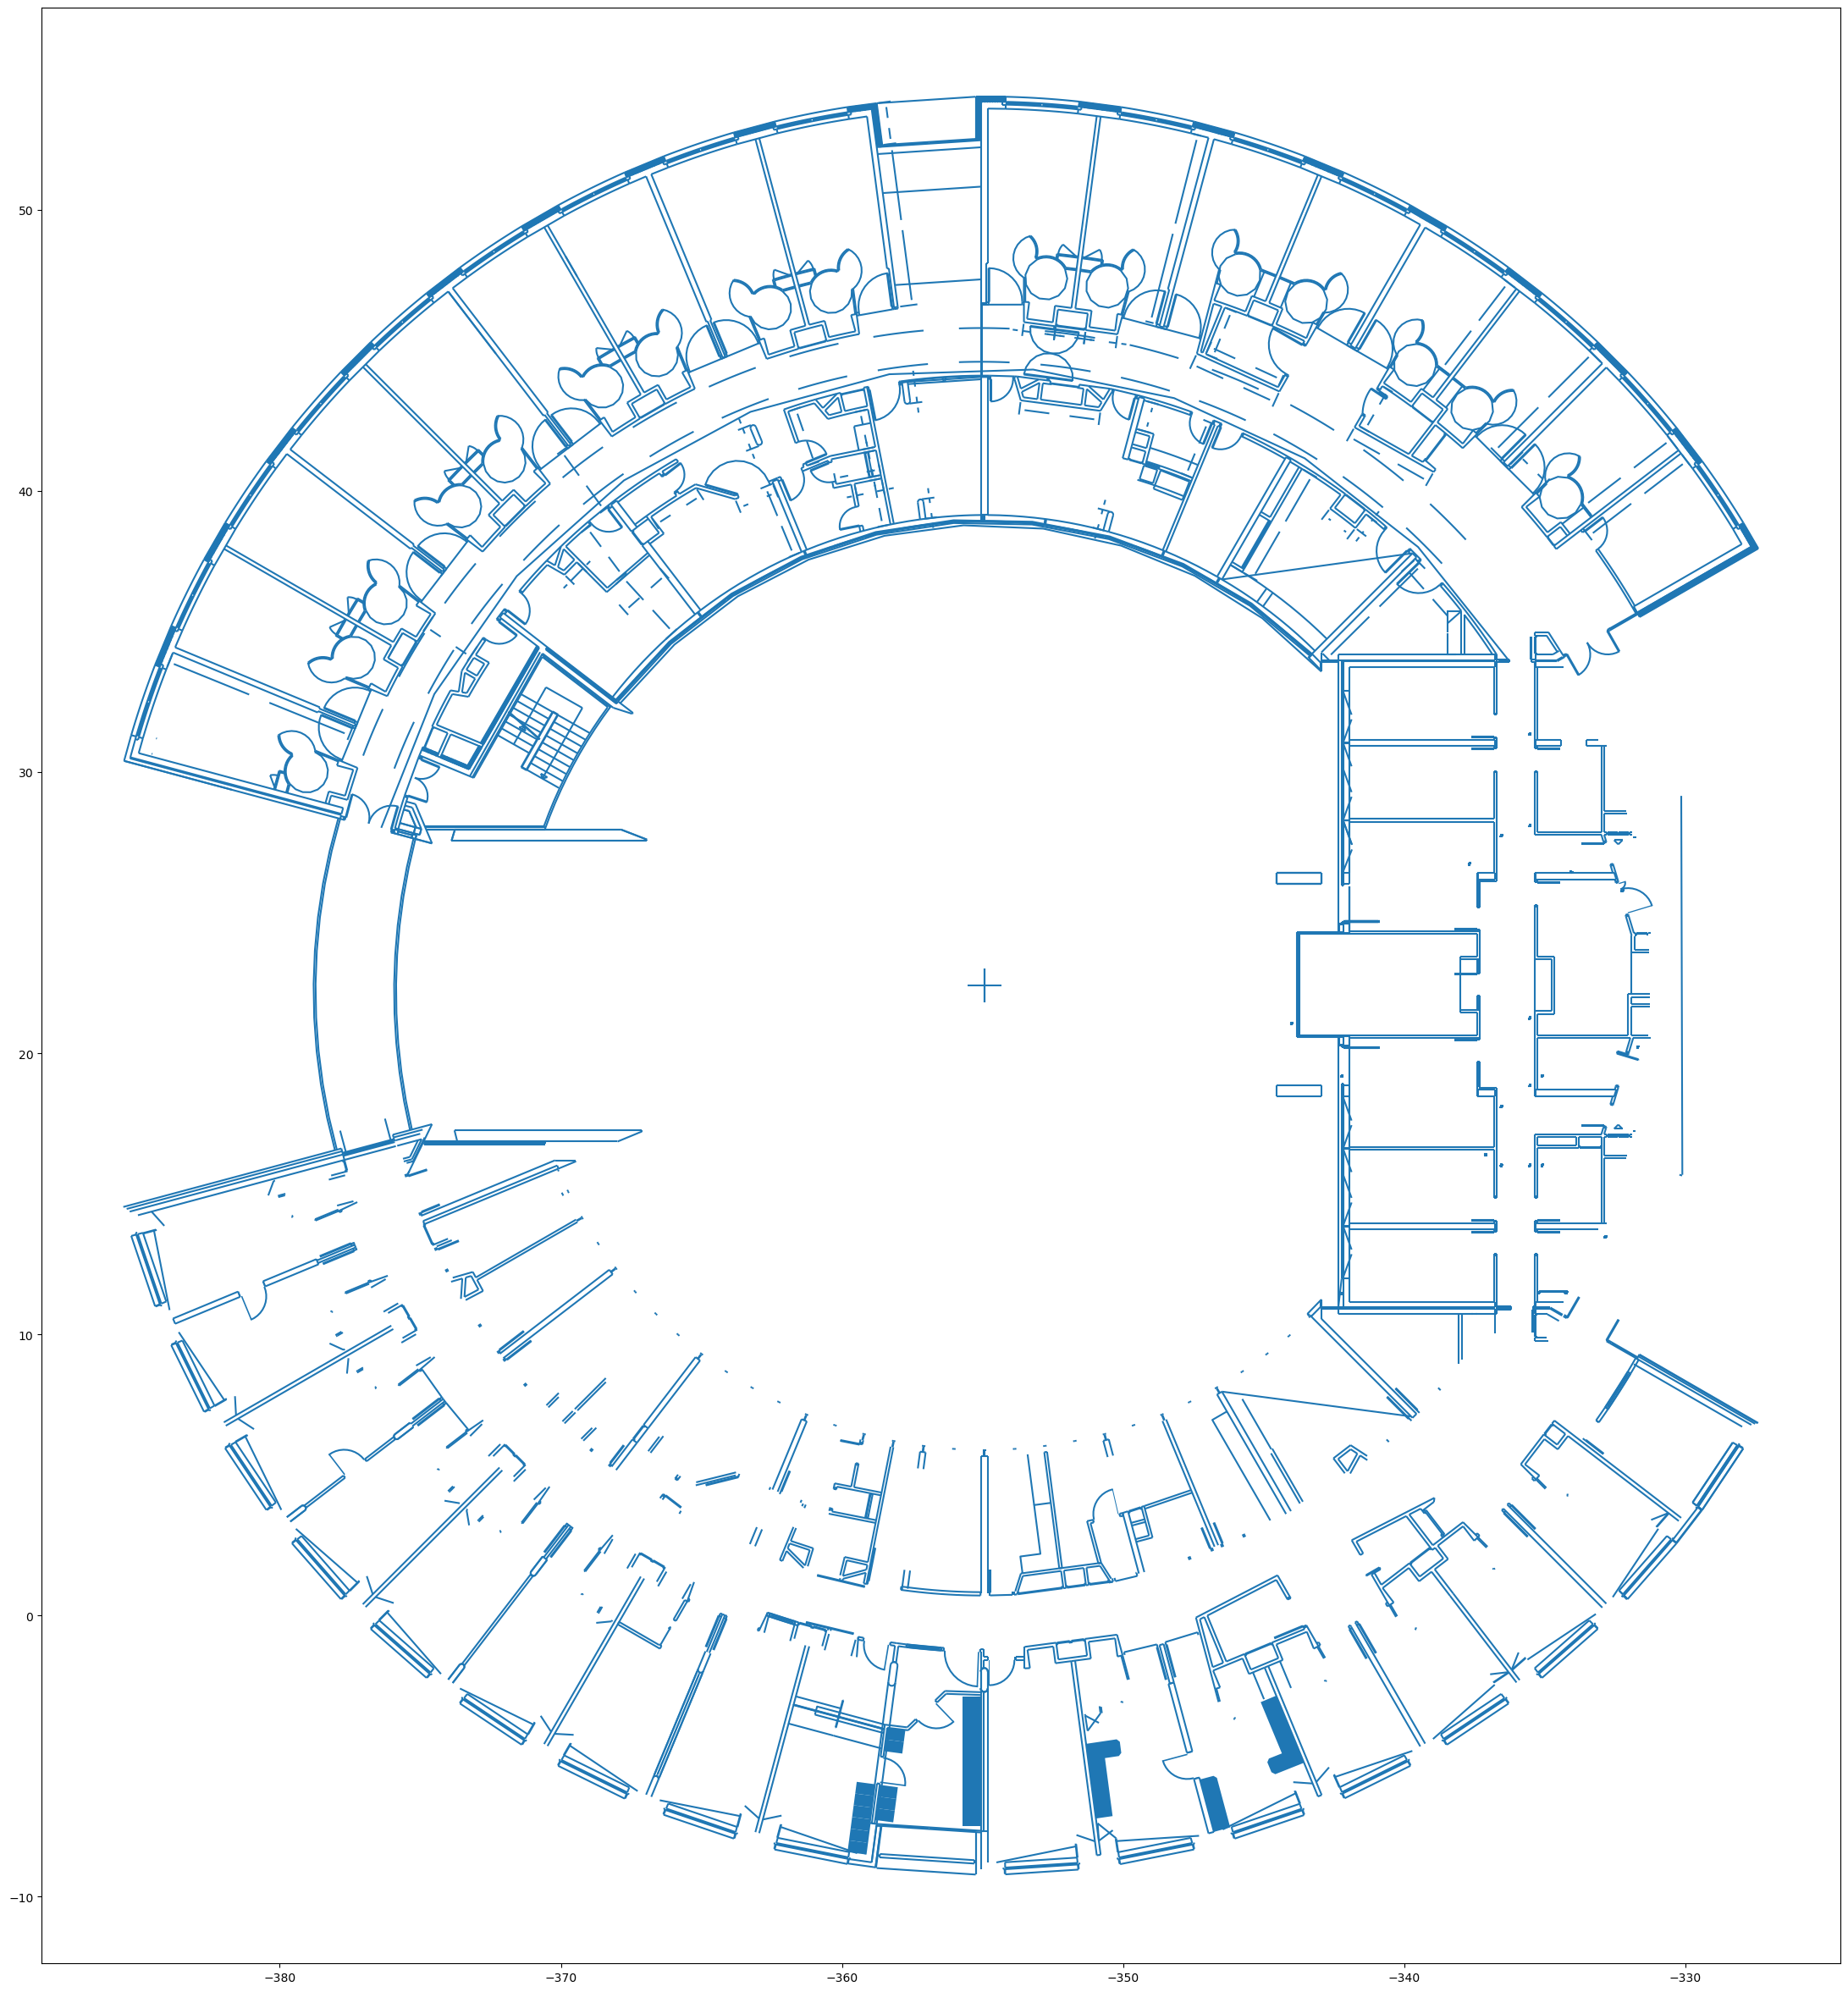

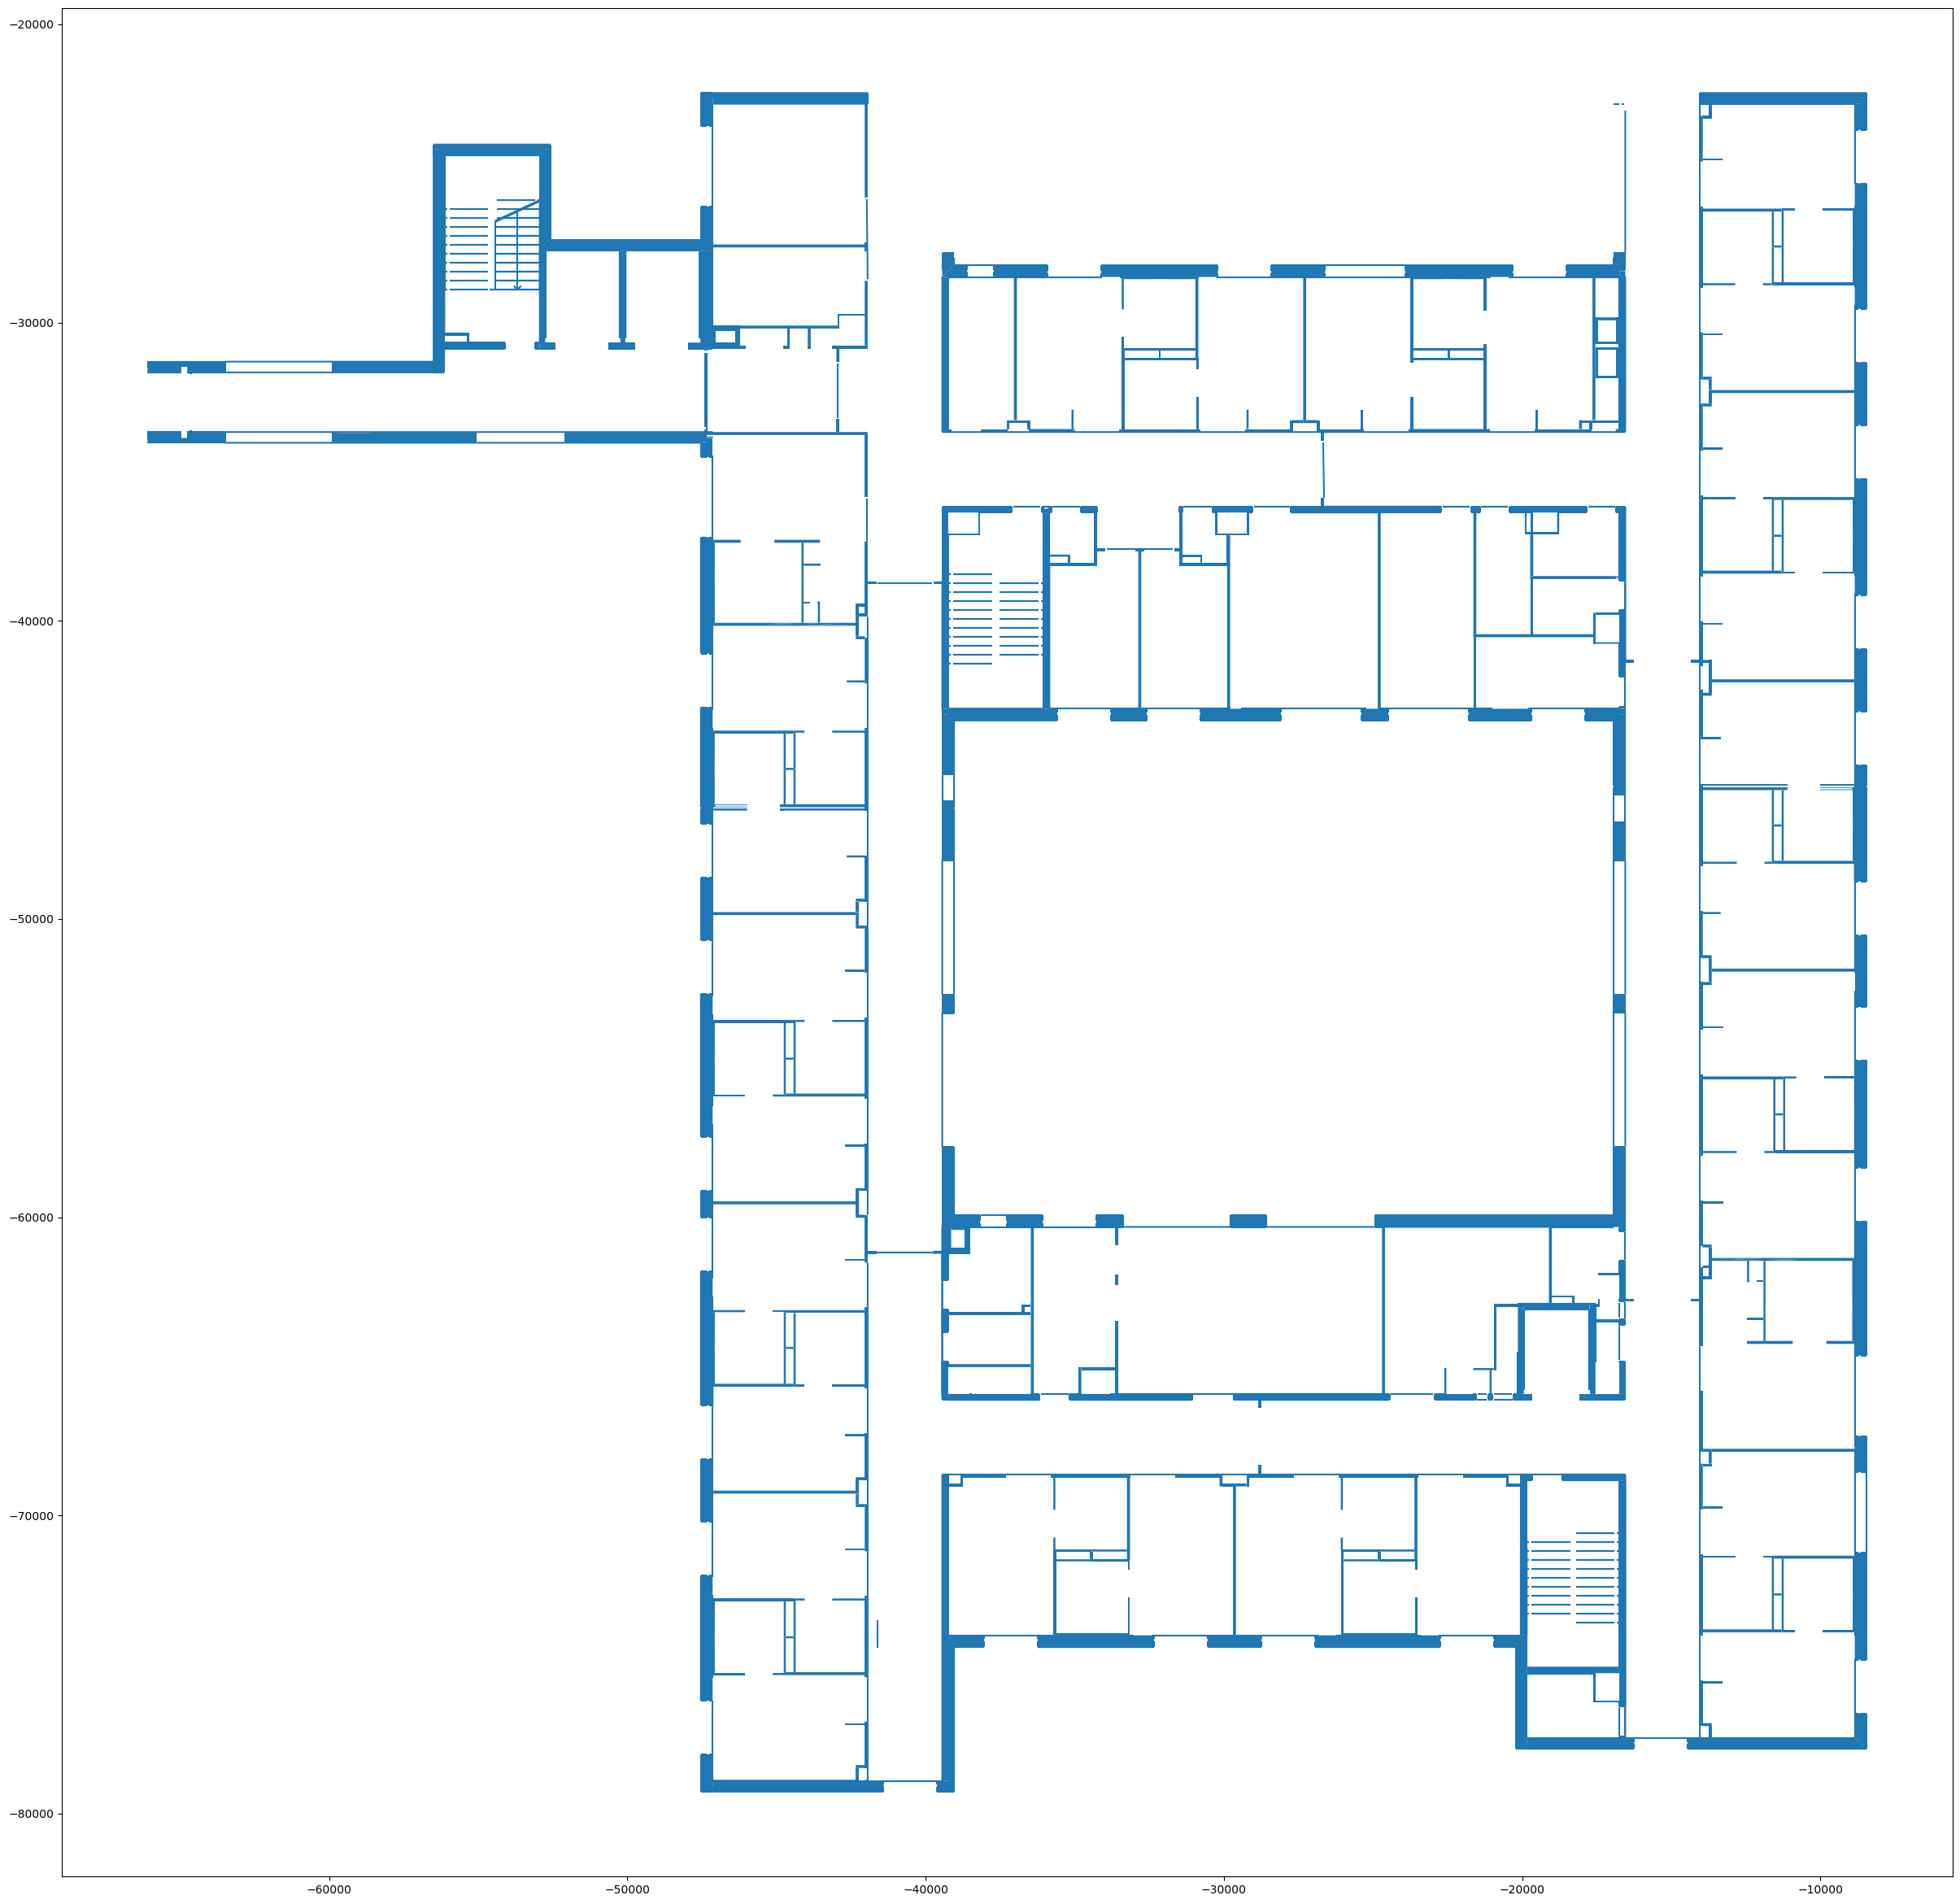

In [10]:
data_dir = Path("data", "geojson")
gdf = [None for _ in range(8)]
for file in data_dir.iterdir():
    gdf[i] = gpd.GeoDataFrame.from_file(file)
    gdf[i].plot(aspect=1, figsize=(30, 30))
    print(gdf[i].shape)

<Axes: >

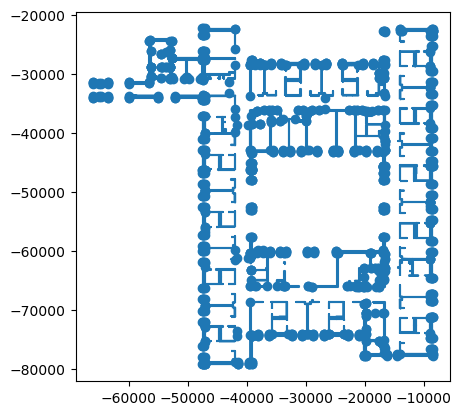

In [6]:
gdf[6].boundary.plot(aspect=1)


/var/folders/vw/2kmjpl310zl2lwgnwpxsyw4r0000gn/T/ipykernel_55432/1212680424.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.boundary.buffer(100).plot(aspect=1)


<Axes: >

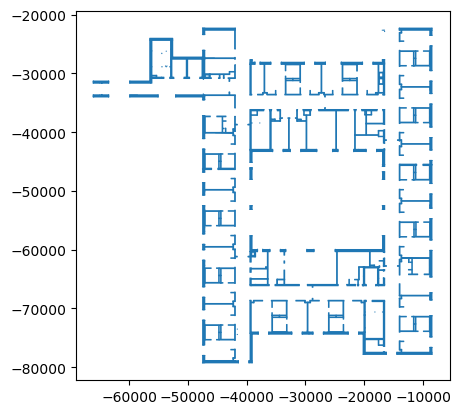

In [8]:
gdf.boundary.buffer(100).plot(aspect=1)

# Union

In [8]:
plan3 = gpd.GeoDataFrame.from_file(Path("data", "Output3.geojson"))

<Axes: >

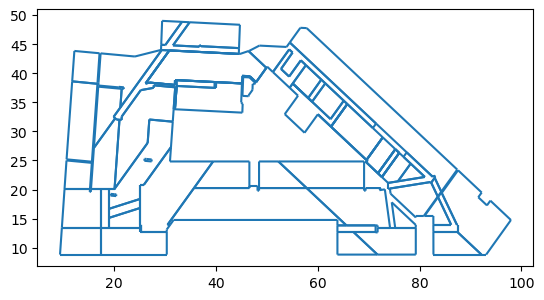

In [9]:
plan3.plot()

<Axes: >

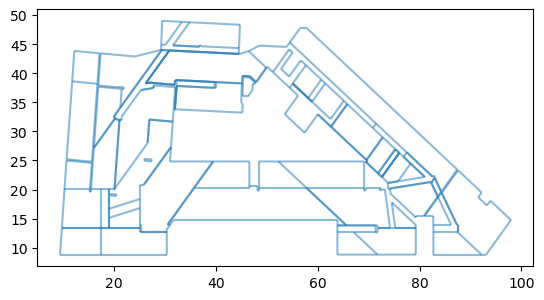

In [ ]:
res_union = plan3.overlay(plan3, how="union")
res_union.plot(alpha=0.5, cmap="tab20")

In [7]:
print(plan3["geometry"][0])

MULTILINESTRING ((26.3553088308664 25.2597235328487, 26.3553088308664 25.2597235328487), (27.3571380574531 25.1786428018111, 26.3553088308664 25.2597235328487), (27.357164753992 24.8287621528667, 27.3571380574531 25.1786428018111), (25.933618627237 24.9433750577477, 27.357164753992 24.8287621528667), (25.962079998597 25.2915485987775, 25.933618627237 24.9433750577477), (26.3553088308664 25.2597235328487, 25.962079998597 25.2915485987775), (19.9954993632536 19.2029828405215, 19.9954993632536 19.2029828405215), (20.4125259879354 19.1689848938202, 19.9954993632536 19.2029828405215), (20.3883996674014 18.8708813526751, 20.4125259879354 19.1689848938202), (19.2920369935081 18.9602619282699, 20.3883996674014 18.8708813526751), (19.3163386131939 19.2583511782141, 19.2920369935081 18.9602619282699), (19.9954993632536 19.2029828405215, 19.3163386131939 19.2583511782141), (17.3391937814478 13.430917257825, 17.3391937814478 13.430917257825), (24.9891932611174 13.4309172506473, 17.3391937814478 13

In [10]:
type(plan3["geometry"][0])

shapely.geometry.multilinestring.MultiLineString

In [12]:
plan3["geometry"][0].bounds

(9.35511591685751, 8.81088134718489, 97.9588887771491, 49.0142219098659)

In [7]:
# Noramlize the data between 0 and one
from shapely.affinity import affine_transform


def create_norm_matrix(geom):
    """Create the matrix used in shapely_affinity.affine_transform to normalize the coordinates."""
    eps = 1e-9  # prevent division by 0
    minx, miny, maxx, maxy = geom.bounds
    matrix = [
        1 / (maxx + eps),
        0,
        1 / (maxy + eps),
        0,
        -minx / (maxx + eps),
        -miny / (maxy + eps),
    ]
    return matrix


plan3_norm = affine_transform(
    plan3["geometry"][0], create_norm_matrix(plan3["geometry"][0])
)
plan3_norm.bounds

NameError: name 'plan3' is not defined

In [17]:
plan3_norm.plot()

AttributeError: 'MultiLineString' object has no attribute 'plot'

## 3. Parse the geometry

In [20]:
gdf[1]["geometry"].describe()

count                                                   252
unique                                                  217
top       POLYGON ((9740.3358279162 132611.30179677255, ...
freq                                                      5
Name: geometry, dtype: object

In [18]:
def get_type(geometry):
    return type(geometry)

gdf[1]["geometry"].apply(get_type)

AttributeError: 'property' object has no attribute 'get'

In [ ]:
from shapely.ops import voronoi_diagram
regions = voronoi_diagram(gdf[1]["geometry"].iloc[1:3].to_list())

AttributeError: 'numpy.ndarray' object has no attribute 'geom_type'

In [29]:
list(regions.geoms)

[<POLYGON ((15188.274 18039.268, 15727.684 17795.154, 15727.684 15093.698, 14...>,
 <POLYGON ((22344.775 25876.655, 22344.775 17795.154, 15727.684 17795.154, 15...>,
 <POLYGON ((8031.773 9657.152, 8031.773 17795.154, 13527.684 17795.154, 13527...>,
 <POLYGON ((11810.497 9657.152, 13527.684 15091.903, 14066.989 15091.903, 140...>,
 <POLYGON ((8031.773 25876.655, 15188.274 25876.655, 15188.274 18039.268, 140...>,
 <POLYGON ((14088.658 9657.152, 14066.989 15091.903, 14067.095 15093.698, 157...>,
 <POLYGON ((13527.684 15091.903, 13527.684 17795.154, 14067.095 17813.183, 14...>,
 <POLYGON ((22344.775 9657.152, 15846.495 9657.152, 15727.684 15093.698, 1572...>]

In [30]:
dir(regions)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__static_attributes__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_emp

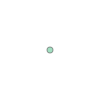

In [33]:
regions.centroid

In [37]:
dir(gdf[1]["geometry"].iloc[1:3])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__p

<Axes: >

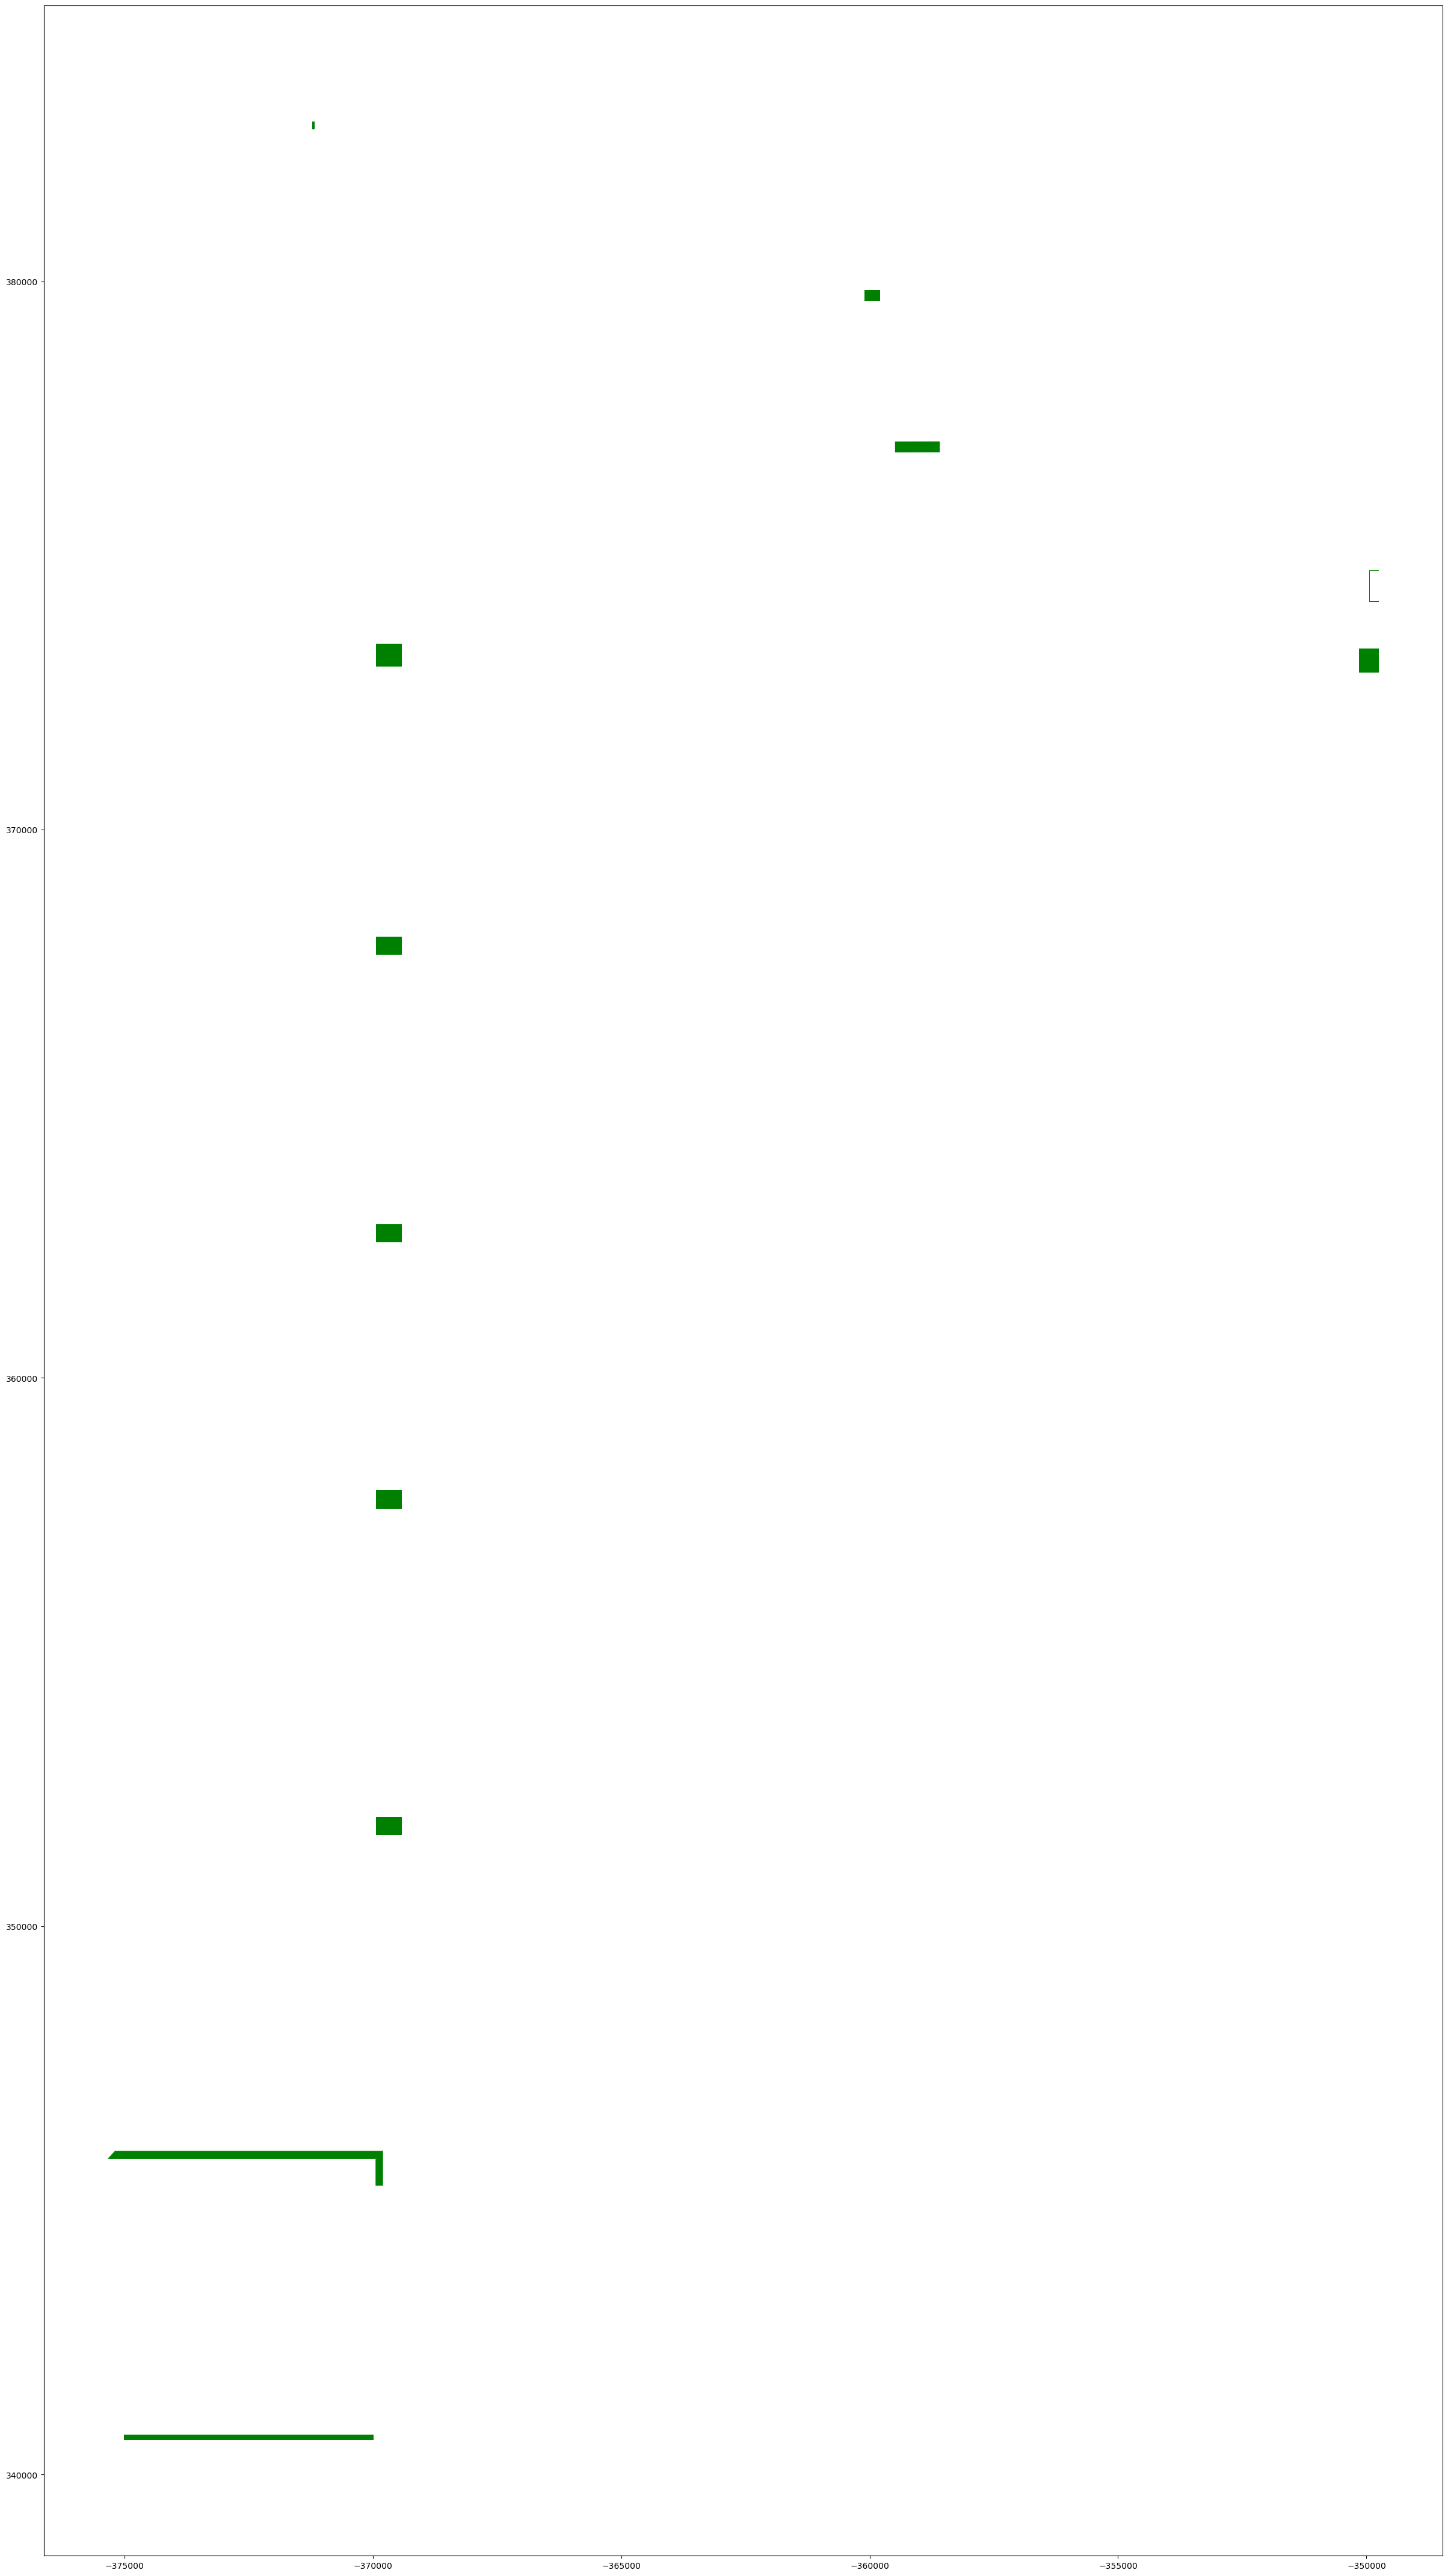

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (30, 120))
gdf[2].iloc[:-1].plot(ax=ax, color="g")
